# Exploratory Data Analysis(EDA)
Exploratory data analysis is an approach to analysing data to summarise their main characteristics, often with visual methods.
in other words, we perform analysis on data that we collected, to find important metrics/features by using some nice and pretty visualisatitons.

# Iris Dataset

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
iris = pd.read_csv('iris.csv')

In [4]:
iris.shape  # Number of data-points and features

(150, 5)

In [5]:
iris.columns 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
# Number of data-points or flowers presesnt for each species
# balance-dataset vd  imbalanced-dataset
iris["species"].value_counts() 
# Iris is a balanced dataset as the number of data points for every class is 50 
# For imbalanced dataset the EDA would have been a bit different

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Univariate analysis: Provides summary statistics for each field in the raw data set (or) summary only on one variable. Ex:- CDF,PDF,Box plot, Violin plot

Bivariate analysis: Performed to find the relationship between each variable in the dataset and the target variable of interest (or) using 2 variables and finding realtionship between them.Ex:-Box plot,Voilin plot.

Multivariate analysis: Performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2. Ex:- Pair plot and 3D scatter plot.

# 2-D Scatter Plotting

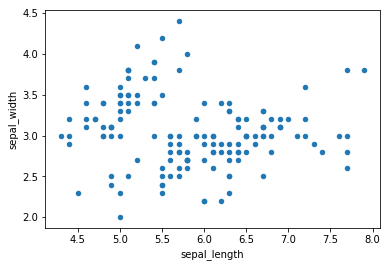

In [7]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width')
plt.show()

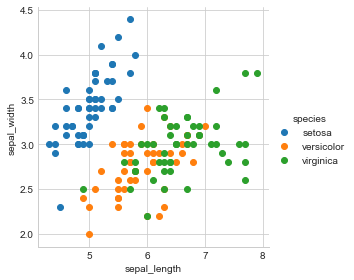

In [8]:
# Better to use color-coding for each flower species
# 2-D Scatter Plotting with color-coding
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue='species', size=4) \
    .map(plt.scatter, "sepal_length", "sepal_width") \
     .add_legend()
        
plt.show()
    
# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.

# Observation(s):
  1. Using sepal_length and sepal_width features, we can distinguish Sentosa flowers from others.
  2. Seperating Versicolor from Virginica(by drawing a line in-between the scatter plots)is much harder as they have considerable overlap 

# 3D Scatter Plot
 Can be visualized as http://plot.ly/python/3d-scatter-plots/
 As only 3 of the features can be considered,like sepal-length, sepal-width and petal-width. So, we are trying to visualize it   in 4D, 5D or 6D, by using Pair-plot which is basically Pair-wise scatter plot

# Pair-Plot

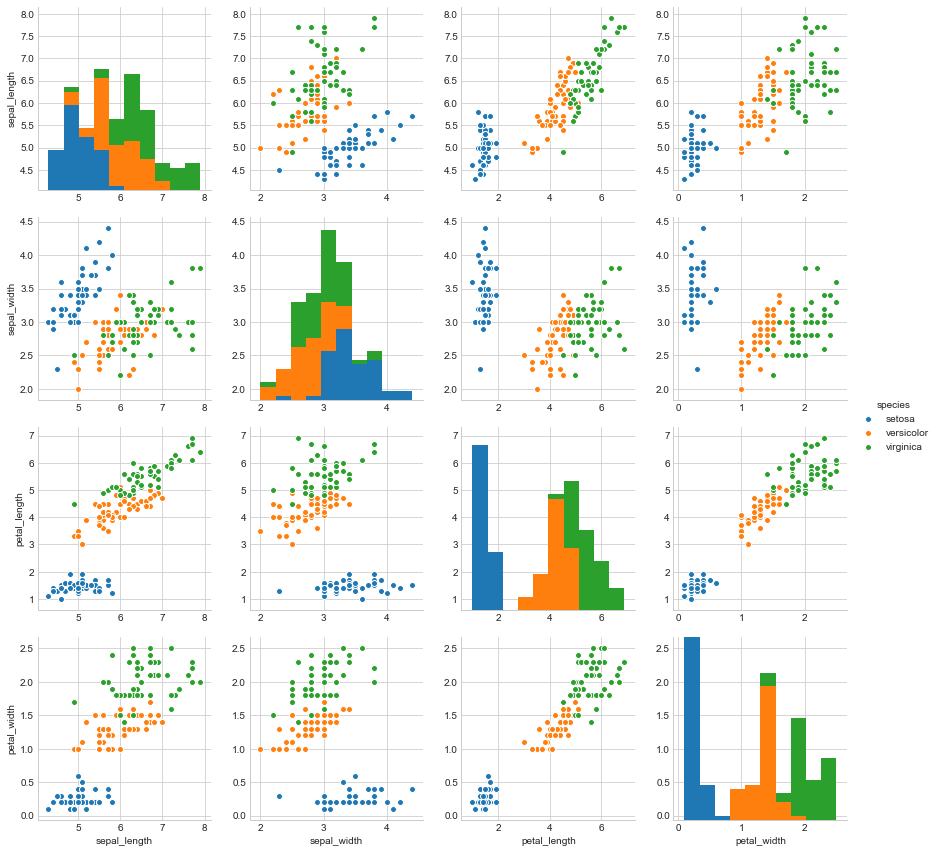

In [9]:
#Pair-wise scatter plot : Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
##Only possible to view 2D patterns.

# Data plots cannot be visualised in 4D, 5D or 6D(which needs to be used for scenarios with more then three features). 
# Hence, pair-plot is the approach
# Here, for 4 features(sepal_length,sepal_width, petal_length, petal_width) the number of pair graphs will be 4C2 = 6. 
# So, possible pairs would be like
# (sepal_length,sepal_width) / (sepal_length,petal_length) / (sepal_width,petal_length) and so on

plt.close()
sns.set_style("whitegrid")
sns.pairplot(iris, hue="species", size=3)
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

# Observation(s)
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# Histogram, PDF(Probability Density Function) and CDF(Cumulative Distribution Function)

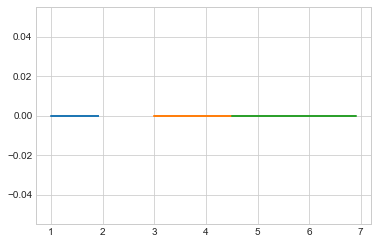

In [10]:
# 1-D scatter plot using just one feature
# Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
# Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1

import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"]
iris_versicolor = iris.loc[iris["species"] == "versicolor"]
iris_virginica = iris.loc[iris["species"] == "virginica"]

plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa["petal_length"]))
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor["petal_length"]))
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica["petal_length"]))

# Disadvantages of 1-D scatter plot: Very hard to make sense as points are overlapping a lot.
# Hence, it's better to use histograms

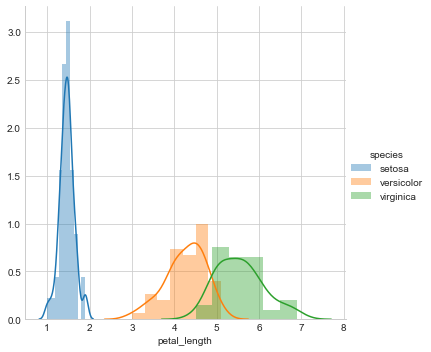

In [11]:
# A better way to visualize 1-D scatter plots
# x-axis : Count of flowers, say here the highest histogram in blue depicts that the count of setosa flowers 
#             having petal-length is 3.2(approx.)
#  y-axis : petal lengths

# And, the bold lines bounding the histograms is PDF(=smoothed histogram(done by KDE))

# We draw this using seaborn as sns, 
#    Facetgrid gives grid layout
#    haberman is data-set
#    hue colors the value/columnname that you give to it
#    Size is graph size and mapping all these to sns.distplot on "petal_length" column.

sns.FacetGrid(iris, hue='species', size=5) \
    .map(sns.distplot, "petal_length") \
     .add_legend()        

# Univariate Analysis using PDF 
 Now , we are considerng only one feature at a time and will then check the graphs

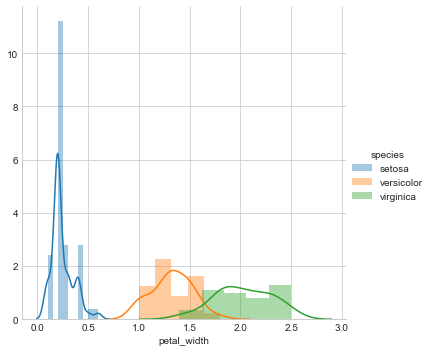

In [12]:
sns.FacetGrid(iris, hue='species', size=5) \
    .map(sns.distplot, "petal_width") \
     .add_legend()   

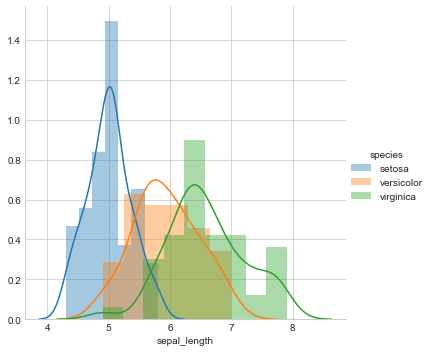

In [13]:
sns.FacetGrid(iris, hue='species', size=5) \
    .map(sns.distplot, "sepal_length") \
     .add_legend()   

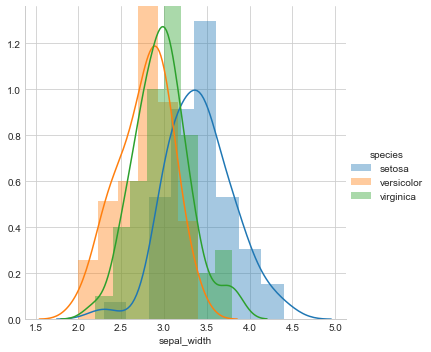

In [14]:
sns.FacetGrid(iris, hue='species', size=5) \
    .map(sns.distplot, "sepal_width") \
     .add_legend()   

# Observation(s)
It is better to consider petal-length as the feature for analysing the species of the flower rather than the other features like petal_width, sepal_width and sepal_length. As the histogram shows more regions of overlapping in other cases


In [15]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.

# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" saying if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.

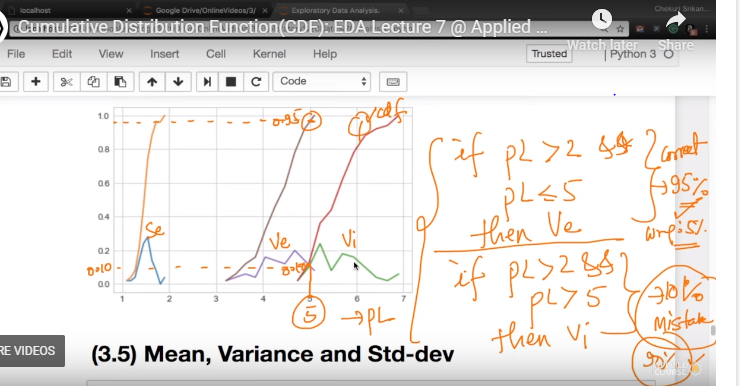

In [16]:
from IPython.display import Image
Image(filename="CDF.png", width=500,height=500)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


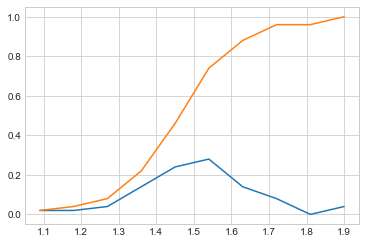

In [34]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length
# CDF can be used to for scenarios like to visually see what perctange of versicolor have petal-lengths less than 1.6
# x-axis : probability
# y-axis : petal_length of setosa 

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density=True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


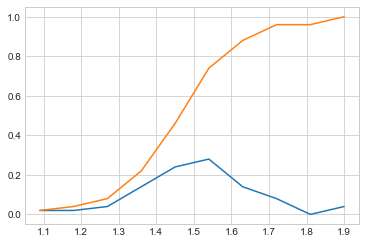

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


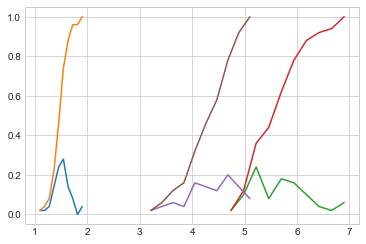

In [18]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# Mean, Variance ad Standard Deviation


In [19]:
# Mean (To depict that the datpoints range within a range)
# Here, Mean of setosa is 1.464, and mean of versicolor, virginica are 4.26, 5.552 respectively which shows that the petal lengths
# of setosa is much shorter than that of versicolor and virginica

print("\nMean:-")
print(np.mean(iris_setosa["petal_length"]))
# Mean with an outlier=50. It means for wrong/abnormal input the value will be by default set to 50
print(np.mean(np.append(iris_setosa["petal_length"],50)))
print(np.mean(iris_versicolor["petal_length"]))
print(np.mean(iris_virginica["petal_length"]))


Mean:-
1.464
2.4156862745098038
4.26
5.552


# Observation(s):
From the above values of mean we can say that setosa typically have a small petal length, while versicolor and virginica tend to have a longer petal length, and they are closer 

In [20]:
# Standard Deviation
print("\nStandard Deviation:-")
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))
print(np.std(iris_virginica["petal_length"]))


Standard Deviation:-
0.17176728442867115
0.4651881339845204
0.5463478745268441


Fot in-detail description checkout --> https://www.youtube.com/watch?v=11BFX7Ygtyo

# Median 

In [21]:
# Median (Mean can get corrupted by an outlier being added in the datset and might cause a major change in the mean's value.
# While, for Median an outlier value in the dataset cannot corrupt it eaily.
# As long as less than 50% of the data-points are corrupted it won't corrupt the value of median
print("\nMedian:")
print(np.median(iris_setosa["petal_length"]))
print(np.median(np.append(iris_setosa["petal_length"],50)))
print(np.median(iris_versicolor["petal_length"]))
print(np.median(iris_virginica["petal_length"]))


Median:
1.5
1.5
4.35
5.55


# Percentiles and Quantiles

In [22]:
#           Percentiles 

# 1st Percentile = datapoints[1]
# 50th Percentile = datapoints[50] and so on

#            Quantiles 

#  (25th, 50th, 75th and 100th percentiles = Quantiles)
#  (0th, 25th, 50th and 75th percentiles = Quantiles)   (Here)
# Different for different libraries
# Where, 1st Quantile = 25th Percentile
#        2nd Quantile = 50th Percentile
#        3rd Quantile = 75th Percentile
#        4th Quantile = 100th Percentile

print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"], np.arange(0, 100, 25))) # It says, all percentile from 0 to 100 with a gap of 25
# [1.    1.4   1.5   1.575]  it means 0th, 25th, 50th and 75th percentiles respectively

print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"], np.arange(0, 100, 25)))


Quantiles:
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]


In [23]:
print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"], 90))
print(np.percentile(iris_versicolor["petal_length"], 90))
print(np.percentile(iris_virginica["petal_length"], 90))


90th Percentiles:
1.7
4.8
6.3100000000000005


# Median Absolute Deviation(MAD) and Inter-Quartile Range

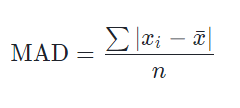

In [25]:
from IPython.display import Image
Image(filename="MAD.png", width=100,height=100)

In [24]:
# Basically an extension of standard-deviation
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


In [27]:
# IQR(Inter-Quartile Range)
# 75th percentile - 25th percentile = 1.575 - 1.4 = 0.175, it means 50% of datapoints lies within this value range

# Box plot and Whiskers

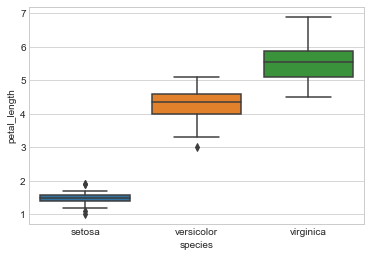

In [25]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below doesn't correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species', y ='petal_length',data=iris)

# The three lines in the boxes formed signifies 25th, 50th and 75th percentile value from bottom to top respectively.
# Hence it says for each species what is the petal-length value of 25th, 50th and 75th percentile
# The width of the boxes along x-axis has no significance. Only the height/length of the boxes along y-axis holds a meaning

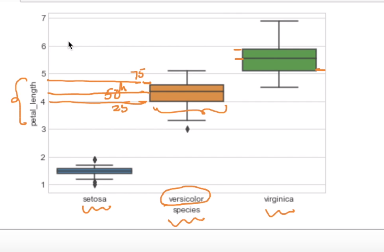

In [39]:
Image(filename="Percentiles.png", width=500,height=500)

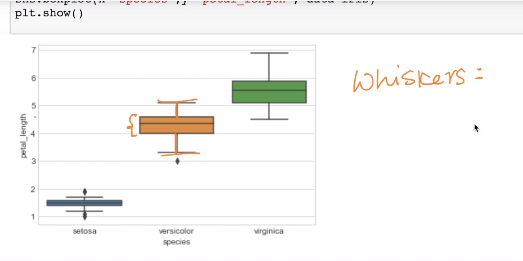

In [35]:
Image(filename="Whiskers.png", width=500,height=500)

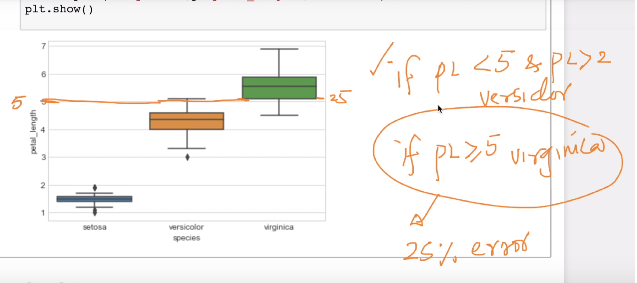

In [37]:
Image(filename="Error.png", width=500,height=500)

# Violin Plots

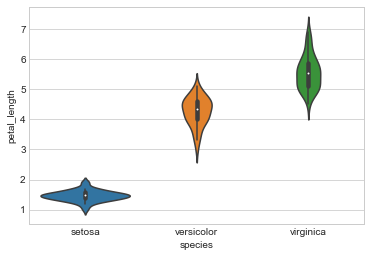

In [26]:
# A violin plot combines the benefits of both histogram and box plots and simplies them 
# Like 

# Denser region of the data are fatter, and sparser ones thinner in a violin plot

sns.violinplot(x='species', y ='petal_length',data=iris, size =8)

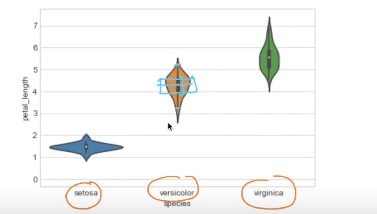

In [40]:
Image(filename="BoxplotsAndWhiskers(in Blue).png", width=500,height=500)

In [27]:
iris_virginica_SW = iris_virginica.iloc[:,1]
iris_versicolor_SW = iris_versicolor.iloc[:,1]

In [28]:
from scipy import stats
stats.ks_2samp(iris_virginica_SW, iris_versicolor_SW)

Ks_2sampResult(statistic=0.26000000000000006, pvalue=0.05604585971442453)

In [29]:
x = stats.norm.rvs(loc=0.2, size=10)
stats.kstest(x,'norm')


KstestResult(statistic=0.2617436489934779, pvalue=0.43007891227624273)

In [30]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')

KstestResult(statistic=0.09547610265424106, pvalue=0.3031926465006223)

In [31]:
x = stats.norm.rvs(loc=0.2, size=1000)
stats.kstest(x,'norm')

KstestResult(statistic=0.11661693008446233, pvalue=2.639000129533997e-12)

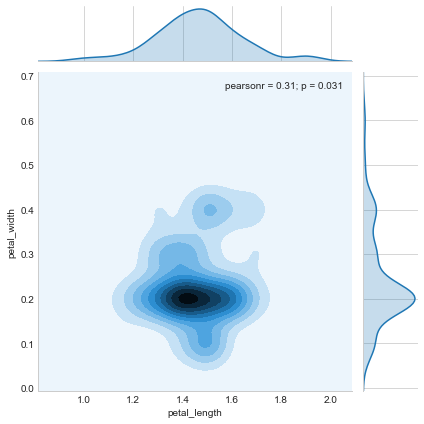

In [32]:
#2D Density plot, contors-plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();